# Pipeline
In data science a ***pipeline*** is a chain of modelling related tasks.  There can be up to $n$ modelling tasks in any given pipeline.  We start with some initial input, which is fed into the first modelling task.  The output of the first modelling task is then fed to the next second modelling task, and so on and so forth, until we reach the final modelling task and output.  

### Accuracy
The simplest measure is **accuracy**. This is the number of correct predictions over the total number of predictions. It's the percent you predicted correctly. In `sklearn`, this is what the `score` method calculates.

### Shortcomings of Accuracy
Accuracy is often a good first glance measure, but it has many shortcomings. If the classes are unbalanced, accuracy will not measure how well you did at predicting. Say you are trying to predict whether or not an email is spam. Only 2% of emails are in fact spam emails. You could get 98% accuracy by always predicting not spam. This is a great accuracy but a horrible model!

### Confusion Matrix
We can get a better picture our model but looking at the confusion matrix. We get the following four metrics:

* **True Positives (TP)**: Correct positive predictions
* **False Positives (FP)**: Incorrect positive predictions (false alarm)
* **True Negatives (TN)**: Correct negative predictions
* **False Negatives (FN)**: Incorrect negative predictions (a miss)

|            | Predicted Yes  | Predicted No   |
| ---------- | -------------- | -------------- |
| Actual Yes | True positive  | False negative |
| Actual No  | False positive | True negative  |




## Metrics 

### Precision, Recall and F1

![](http://i.stack.imgur.com/ysM0Z.png)
Instead of accuracy, there are some other scores we can calculate:

* **Precision**: A measure of how good your positive predictions are
    ```
    Precison = TP / (TP + FP)
             = TP / (predicted yes)
    ```
* **Recall**: A measure of how well you predict positive cases. Aka *sensitivity*.
    ```
    Recall = TP / (TP + FN) 
           = TP / (actual yes)
    ```
* **F1 Score**: The harmonic mean of Precision and Recall
    ```
    F1 = 2 / (1/Precision + 1/Recall)
       = 2 * Precision * Recall / (Precision + Recall)
       = 2TP / (2TP + FN + FP)
    ```

Accuracy can also be written in this notation:
```
Accuracy = (TP + TN) / (TP + FP + TN + FN)
```

![](http://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)


# Preparation

## Data Loading

In [1]:
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
%matplotlib inline
mnist = fetch_mldata('MNIST original')

## Data Exploration

In [2]:
target = mnist.target
print(mnist.data.shape)

(70000, 784)


Text(0.5,1,'Histgram of Labels')

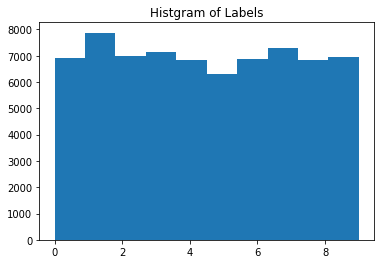

In [3]:
import seaborn
plt.hist(target)
plt.title("Histgram of Labels")

** The data set seems to be quite balanced, so we will continue to the next step**

## Train-Validation-Test Seperation

In [4]:
from sklearn.model_selection import train_test_split
train_im, test_validation_im, train_lb, test_validation_lb = train_test_split(
    mnist.data, mnist.target, test_size = 0.4, random_state = 41)
validation_im, test_im, validation_lb, test_lb = train_test_split(
    test_validation_im, test_validation_lb, test_size = 0.5, random_state = 41)

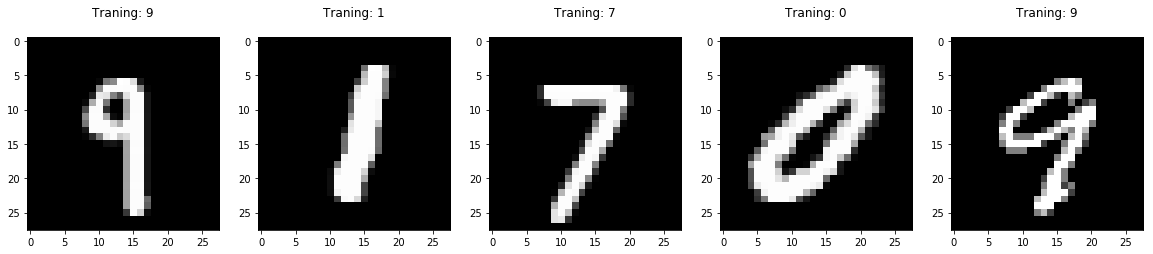

In [5]:
import numpy as np
plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(train_im[0:5], train_lb[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap = plt.cm.gray)
    plt.title('Traning: %i\n'%label)

# Demensionality Reduction

## PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(train_im)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

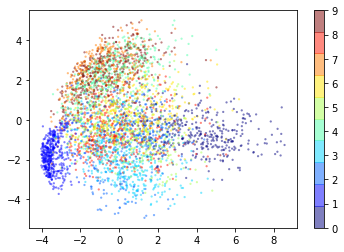

In [5]:
plt.scatter(pca_result[:4000, 0], pca_result[:4000, 1], c=y_train[:4000], edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('jet', 10), s=5)
plt.colorbar()
plt.show()
plt.savefig("/Users/zsk/Downloads/python/other/machine_learning/mnist_pca1.png")

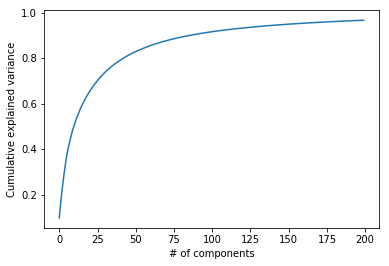

In [6]:
pca = PCA(200)
pca_full = pca.fit(X_train)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Eigen Faces

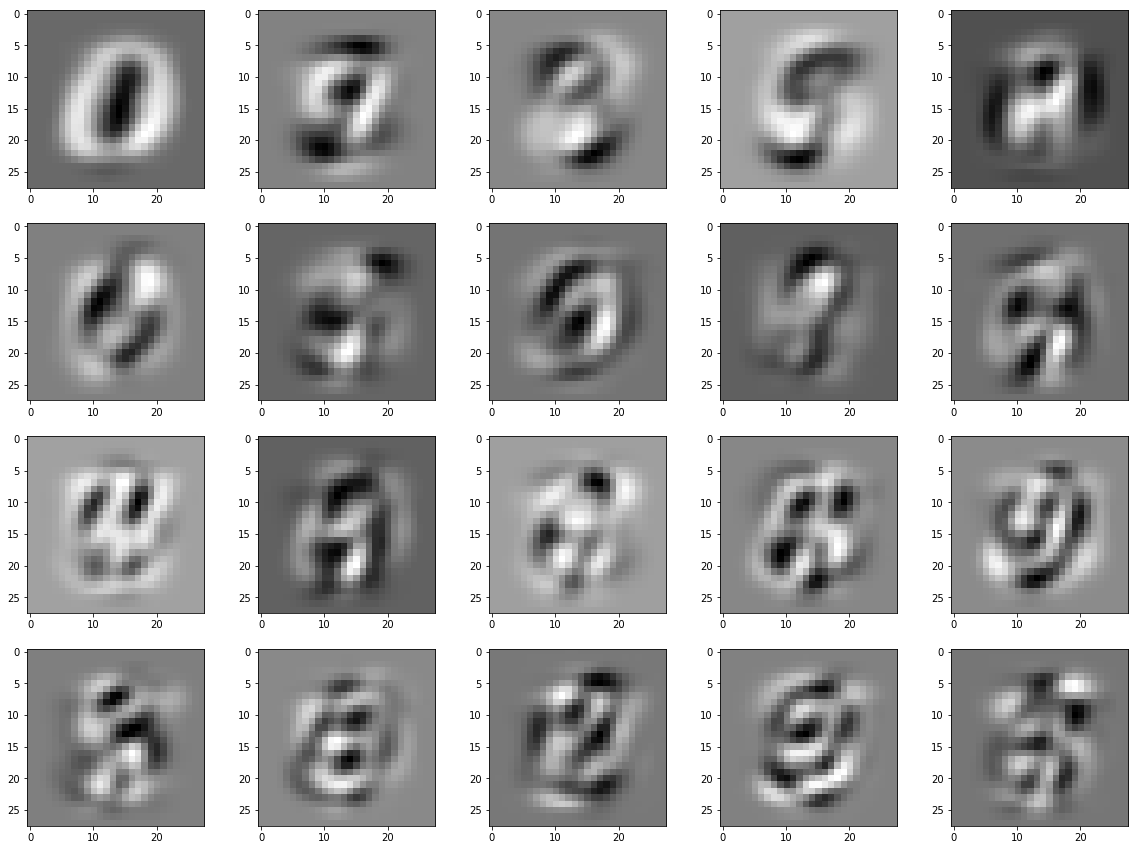

In [7]:
plt.figure(figsize = (20,15))
for index, image in enumerate(zip(pca.components_[0:20])):
    plt.subplot(4,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap = plt.cm.gray)

In [8]:
train = pca.transform(train_im)
train.shape

(42000, 50)

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(
    max_features = 30, min_samples_split = 20, max_depth = 5), 
                              n_estimators = 1000, learning_rate = 0.1)
start = time()
adaboost.fit(train, train_lb)
print("Train time: %.2f seconds" % (time()-start))

Train time: 1009.46 seconds


In [13]:
from sklearn.metrics import classification_report
validation = pca.transform(validation_im)
adaboost_pred = adaboost.predict(validation)
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(adaboost_pred, validation_lb, target_names = 
                           target_names))

             precision    recall  f1-score   support

          0       0.84      0.99      0.91      1149
          1       0.94      0.99      0.97      1518
          2       0.91      0.87      0.89      1450
          3       0.85      0.93      0.89      1303
          4       0.83      0.91      0.87      1224
          5       0.85      0.80      0.83      1304
          6       0.92      0.97      0.94      1261
          7       0.88      0.97      0.92      1376
          8       0.97      0.73      0.83      1775
          9       0.90      0.80      0.84      1640

avg / total       0.89      0.89      0.89     14000



## Random Forests

Probably the most common ensemble method is a *Random Forest*, which consists of a collection of Decision Trees.

They were developed by Leo Breimen, who has the most extensive notes about them on his [webpage](http://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm).

The idea is to repeatedly randomly select data from the dataset (*with replacement*) and build a Decision Tree with each new sample. The default is to have the randomly selected data be the same size as the initial dataset. Note that since we are sampling with replacement, many data points will be repeated in the sample and many won't be included.

Random Forests also limit each node of the Decision Tree to only consider splitting on a random subset of the features.

Here is the pseudocode for creating a Random Forest:

    CreateRandomForest(data, num_trees, num_features):
        Repeat num_trees times:
            Create a random sample of the test data with replacement
            Build a decision tree with that sample (only consider num_features features at each node)
        Return the list of the decision trees created


The default parameters that sklearn uses, which are also standard defaults, are 10 trees and only considering sqrt(m) features (where m is the total number of features).

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000, max_depth = 5, n_jobs = 2)
start = time()
rfc.fit(train, train_lb)
print("Train time: %.2f seconds" % (time()-start))

Train time: 85.07 seconds


In [18]:
validation = pca.transform(validation_im)
rfc_pred = rfc.predict(validation)
target_names = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(rfc_pred, validation_lb, target_names = 
                            target_names))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90      1296
          1       0.92      0.90      0.91      1636
          2       0.80      0.80      0.80      1389
          3       0.86      0.70      0.77      1747
          4       0.83      0.80      0.81      1385
          5       0.58      0.87      0.70       814
          6       0.91      0.87      0.89      1386
          7       0.87      0.87      0.87      1524
          8       0.77      0.68      0.72      1493
          9       0.73      0.80      0.76      1330

avg / total       0.83      0.82      0.82     14000



## Hypertuning
With any machine learning algorithm we must pass some set of parameters to initialize the model. For any model the set of hyperparameters we use depends on the data we are trying to train on.  The process of finding the optimal set of hyperparameters for your model for the given dataset is called ***hypertuning***.  The process of hypertuning innvolves training multiple models with different sets of hyperparameters and using some metric or culmination of metrics(i.e. F1 Score, Precision, Recall, etc.) to determine the optimal set of hyperparameters.  We choose the optimal set of hyperparameters based on the model using the optimal set of hyperparameters producing the best overall metrics for the validation and/or training set of data.

### Grid Search
Grid searches are typically used when you don't know (and often don't care too much about the meaning of) a set of optimal parameters to a given estimator or set of estimators. They are essentially a set of for loops that try out a series of parameters and construct a single model for each case (hence a grid). Scikits has a [grid search class](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) that will automate an exhaustive or optimized search for one or more estimator parameters.

Also somewhat confusingly, people will often conflate "pipeline" and "grid search", sometimes using the former to mean the latter. You can do a grid search as part of a pipeline, using a final function to estimate model quality, and the output of the tested models as input. Scikits has an [example of this here](http://scikit-learn.org/stable/modules/pipeline.html#pipeline).

There are two kinds of Grid Search, exhaustive and random.

![a](https://cdn-images-1.medium.com/max/1920/1*Uxo81NjcpqNXYJCeqnK1Pw.png)

In [19]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params = {"n_estimators": sp_randint(100, 1500),
              "min_samples_split": sp_randint(10,50),
              "max_features": sp_randint(20,40),
              "max_depth": sp_randint(1,10)}
rfc_grid = RandomForestClassifier(n_jobs = 2)
n_iter_search = 10

random_search_rfc = RandomizedSearchCV(rfc_grid, param_distributions=params, 
                                   n_iter=n_iter_search)
start = time()
    
random_search_rfc.fit(train, train_lb)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print("best params:",random_search_rfc.best_params_)
print("score:",random_search_rfc.best_score_)

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


RandomizedSearchCV took 4717.30 seconds for 10 candidates parameter settings.
best params: {'max_depth': 8, 'max_features': 20, 'min_samples_split': 20, 'n_estimators': 226}
score: 0.8429047619047619


In [20]:
rfc_grid_pred = random_search_rfc.predict(validation)
print(classification_report(rfc_grid_pred, validation_lb, target_names = 
                           target_names))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92      1295
          1       0.93      0.95      0.94      1560
          2       0.81      0.82      0.82      1361
          3       0.81      0.76      0.79      1531
          4       0.82      0.88      0.85      1255
          5       0.76      0.75      0.76      1263
          6       0.92      0.90      0.91      1354
          7       0.85      0.92      0.88      1411
          8       0.76      0.68      0.72      1485
          9       0.82      0.80      0.81      1485

avg / total       0.84      0.84      0.84     14000



## Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from time import time
adaboost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(
    max_features = 30, min_samples_split = 20, max_depth = 5), 
                              n_estimators = 1000, learning_rate = 0.1)
start = time()
adaboost.fit(train, train_lb)
print("Train time: %.2f seconds" % (time()-start))

Train time: 1025.17 seconds


In [22]:
from sklearn.metrics import classification_report
validation = pca.transform(validation_im)
adaboost_pred = adaboost.predict(validation)
print(classification_report(adaboost_pred, validation_lb, target_names = 
                           target_names))

             precision    recall  f1-score   support

          0       0.83      0.99      0.90      1133
          1       0.95      0.99      0.97      1524
          2       0.91      0.88      0.90      1442
          3       0.86      0.92      0.89      1343
          4       0.85      0.92      0.88      1248
          5       0.83      0.81      0.82      1263
          6       0.94      0.96      0.95      1299
          7       0.88      0.98      0.92      1370
          8       0.96      0.73      0.83      1741
          9       0.90      0.80      0.85      1637

avg / total       0.90      0.89      0.89     14000



## XGBoost

In [14]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
from xgboost.sklearn import XGBClassifier
from time import time
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, 
                         objective='binary:logistic')
start = time()
XGBmodel.fit(train, train_lb)
print("train time: %.2f seconds" %(time()-start))

train time: 69.77 seconds


In [15]:
validation = pca.transform(validation_im)
validation_predlb = XGBmodel.predict(validation)
from sklearn.metrics import classification_report
print(classification_report(validation_lb, validation_predlb, target_names = 
                            target_names))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95      1357
          1       0.95      0.96      0.96      1599
          2       0.90      0.88      0.89      1392
          3       0.88      0.89      0.89      1435
          4       0.88      0.90      0.89      1347
          5       0.87      0.85      0.86      1233
          6       0.93      0.95      0.94      1329
          7       0.94      0.92      0.93      1524
          8       0.88      0.87      0.87      1326
          9       0.87      0.88      0.87      1458

avg / total       0.91      0.91      0.91     14000



In [25]:
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint
params = {"n_estimators": sp_randint(100, 1500),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,10)}

In [24]:
from time import time
XGBmodel2 = XGBClassifier(booster='gbtree', n_jobs=2, 
                         objective='binary:logistic')
n_iter_search = 10

random_search = RandomizedSearchCV(XGBmodel2, param_distributions=params, n_iter=n_iter_search)
start = time()
    
random_search.fit(train, train_lb)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
print("best params:",random_search.best_params_)
print("score:",random_search.best_score_)

RandomizedSearchCV took 9235.18 seconds for 10 candidates parameter settings.
best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 752}
score: 0.9620714285714286


In [26]:
v_predict = random_search.predict(validation)
print(classification_report(validation_lb, v_predict, target_names =
                           target_names))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1357
          1       0.99      0.98      0.98      1599
          2       0.96      0.97      0.96      1392
          3       0.96      0.95      0.96      1435
          4       0.97      0.97      0.97      1347
          5       0.96      0.97      0.96      1233
          6       0.97      0.99      0.98      1329
          7       0.98      0.97      0.97      1524
          8       0.95      0.96      0.95      1326
          9       0.96      0.95      0.95      1458

avg / total       0.97      0.97      0.97     14000



In [5]:
param_C = 5
param_gamma = 0.05
classifier = svm.SVC(C=param_C, gamma=param_gamma)


start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now()
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))


Start learning at 2018-04-01 14:55:19.719483
Stop learning 2018-04-01 15:17:33.337204
Elapsed learning 0:22:13.617721


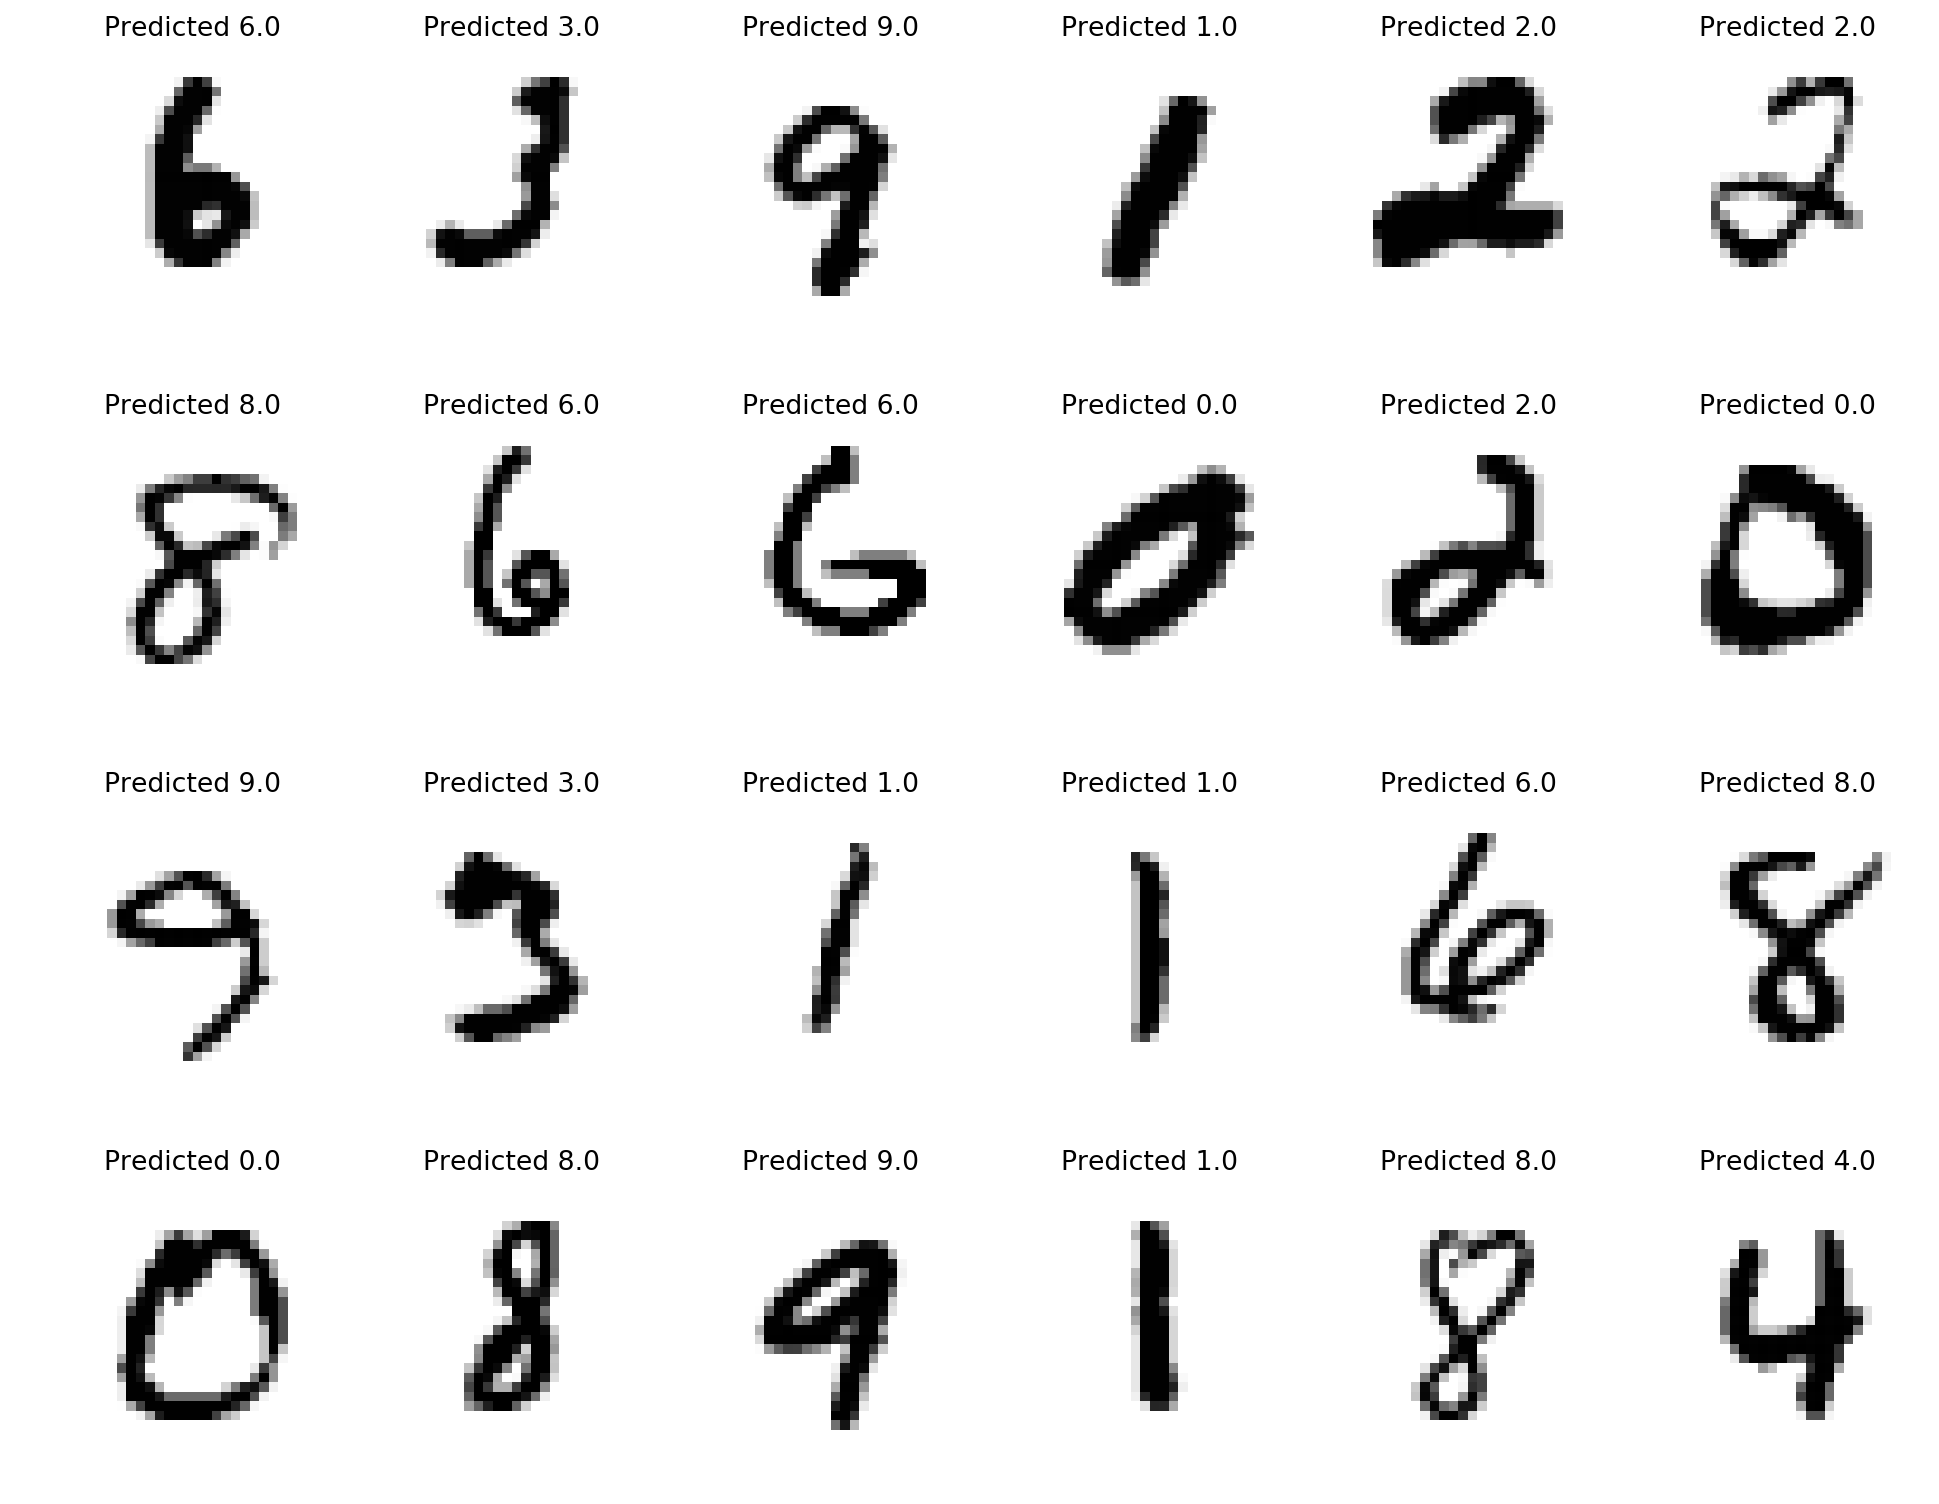

In [6]:
expected = y_test
predicted = classifier.predict(X_test)

show_some_digits(X_test, predicted, title_text="Predicted {}")
plt.show()

In [7]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

plot_confusion_matrix(cm)

print("Accuracy={}".format(metrics.accuracy_score(expected, predicted)))

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1024
        1.0       0.99      0.99      0.99      1185
        2.0       0.98      0.99      0.98      1051
        3.0       0.98      0.98      0.98      1057
        4.0       0.99      0.99      0.99       964
        5.0       0.98      0.98      0.98       964
        6.0       0.99      0.99      0.99      1085
        7.0       0.99      0.98      0.99      1128
        8.0       0.97      0.98      0.97      1037
        9.0       0.98      0.97      0.98      1005

avg / total       0.99      0.99      0.99     10500


Confusion matrix:
[[1014    0    2    0    0    2    2    0    1    3]
 [   0 1177    2    1    1    